In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset has columns as belows. Other columns are dropped out.

WAR	AB	R	HR	TB	RBI	BB	IB	SF	AVG	OBP	SLG	OPS	wRC+

And there are also only AB>30 samples to exclude meaningless data.

In [2]:
df = pd.read_csv('/content/sample_data/KBO increased data_over 30 AB.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WAR     191 non-null    float64
 1   AB      191 non-null    int64  
 2   R       191 non-null    int64  
 3   HR      191 non-null    int64  
 4   TB      191 non-null    int64  
 5   RBI     191 non-null    int64  
 6   BB      191 non-null    int64  
 7   IB      191 non-null    int64  
 8   SF      191 non-null    int64  
 9   AVG     191 non-null    float64
 10  OBP     191 non-null    float64
 11  SLG     191 non-null    float64
 12  OPS     191 non-null    float64
 13  wRC+    191 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 21.0 KB


In [4]:
df.describe()

,WAR,AB,R,HR,TB,RBI,BB,IB,SF,AVG,OBP,SLG,OPS,wRC+
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,1.083927,256.136126,39.209424,7.439791,108.481675,37.759162,26.86911,0.780105,2.722513,0.257393,0.332539,0.378440,0.710979,84.202618
std,1.680480,168.155418,29.496799,9.015501,86.204032,32.460091,20.60630,1.550491,2.779903,0.053694,0.053478,0.104888,0.146777,39.769539
min,-1.350000,31.000000,1.000000,0.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.088000,0.154000,0.125000,0.289000,-43.900000
25%,-0.170000,101.500000,13.000000,1.000000,34.500000,10.000000,9.50000,0.000000,0.000000,0.231500,0.301000,0.307000,0.609500,61.200000
50%,0.510000,234.000000,33.000000,4.000000,87.000000,30.000000,21.00000,0.000000,2.000000,0.264000,0.339000,0.383000,0.732000,91.500000
75%,1.975000,406.000000,60.000000,10.500000,182.000000,58.500000,44.50000,1.000000,4.000000,0.294000,0.369000,0.448000,0.805500,108.950000
max,8.320000,574.000000,143.000000,46.000000,352.000000,132.000000,96.00000,9.000000,13.000000,0.360000,0.447000,0.660000,1.080000,183.700000


In [5]:
corr_matrix = df.corr()
corr_matrix["WAR"].sort_values(ascending=False)

,WAR
WAR,1.000000
R,0.856051
TB,0.842795
RBI,0.793387
BB,0.792048
AB,0.772725
wRC+,0.752975
OPS,0.747921
SLG,0.693797
OBP,0.692001


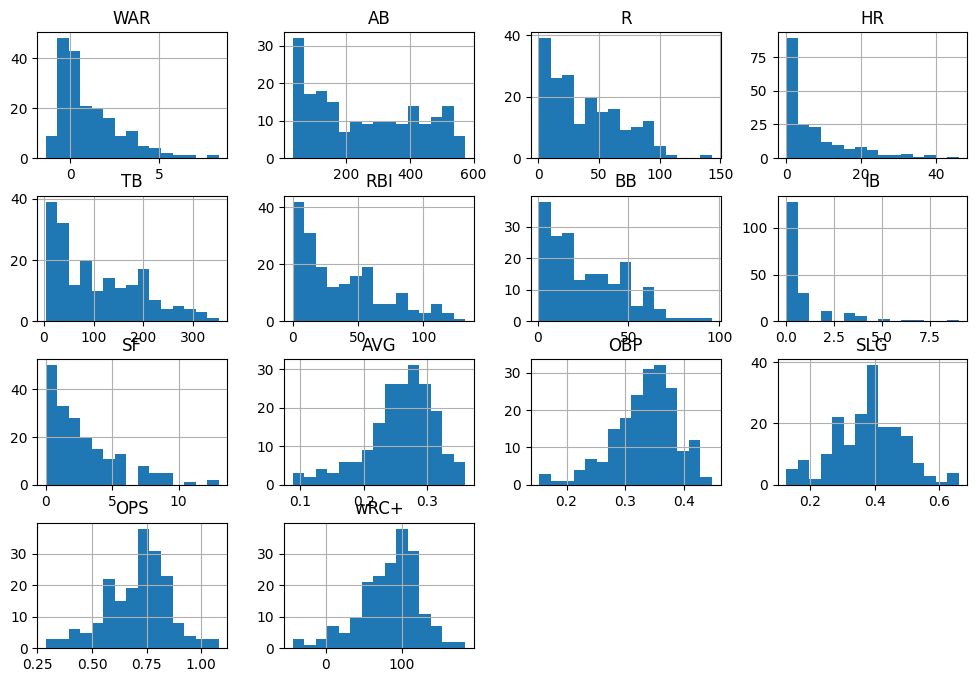

In [6]:
df.hist(bins=15, figsize=(12, 8))
plt.show()

Use R, RBI, TB for prediction

In [32]:
R = df["R"]
RBI = df["RBI"]
TB = df["TB"]

In [33]:
# change 0 to 1
for col in [R, RBI, TB]:
  col[col==0] = 1

<ipython-input-33-f8e9e68db781>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col==0] = 1
<ipython-input-33-f8e9e68db781>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col==0] = 1
<ipython-input-33-f8e9e68db781>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col==0] = 1


In [34]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
R = log_transformer.fit_transform(R)
RBI = log_transformer.fit_transform(RBI)
TB = log_transformer.fit_transform(TB)

<Axes: >

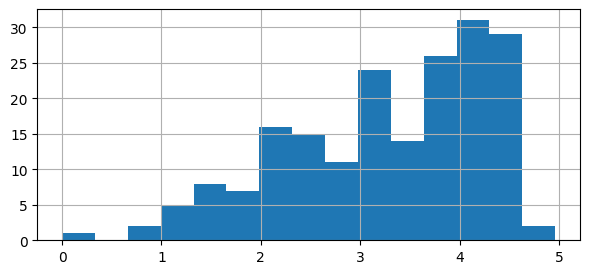

In [35]:
R.hist(bins=15, figsize=(7, 3))

<Axes: >

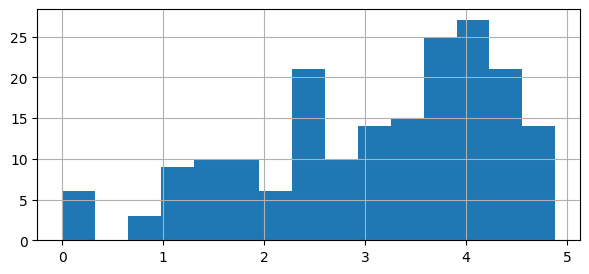

In [36]:
RBI.hist(bins=15, figsize=(7, 3))

<Axes: >

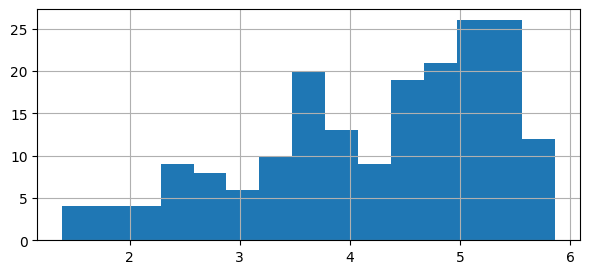

In [37]:
TB.hist(bins=15, figsize=(7, 3))

<Axes: >

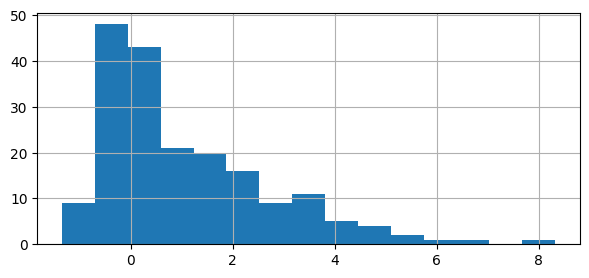

In [38]:
WAR.hist(bins=15, figsize=(7, 3))

In [39]:
# add 1.351 to WAR (to make all value > 0)
WAR = df["WAR"]
WAR = WAR + 1.351
WAR.describe()

,WAR
count,191.000000
mean,2.434927
std,1.680480
min,0.001000
25%,1.181000
50%,1.861000
75%,3.326000
max,9.671000


<Axes: >

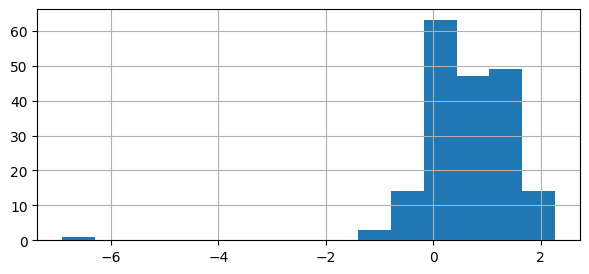

In [40]:
WAR = log_transformer.fit_transform(WAR)
WAR.hist(bins=15, figsize=(7, 3))

In [41]:
# make final dataset
final_df = pd.DataFrame()
final_df["R"] = R
final_df["RBI"] = RBI
final_df["TB"] = TB
final_df["WAR"] = WAR

In [42]:
final_df

,R,RBI,TB,WAR
0,4.962845,4.691348,5.863631,2.269132
1,4.521789,4.574711,5.652489,1.562556
2,4.454347,4.110874,5.293305,1.418520
3,3.871201,4.043051,5.241747,1.316676
4,4.317488,4.025352,5.214936,1.258745
...,...,...,...,...
186,2.302585,2.302585,3.401197,0.087095
187,1.098612,0.693147,2.564949,-0.596020
188,1.098612,1.098612,2.079442,-6.907755
189,2.484907,0.000000,1.791759,0.131905


In [44]:
final_df.to_csv('/content/sample_data/final_df.csv')